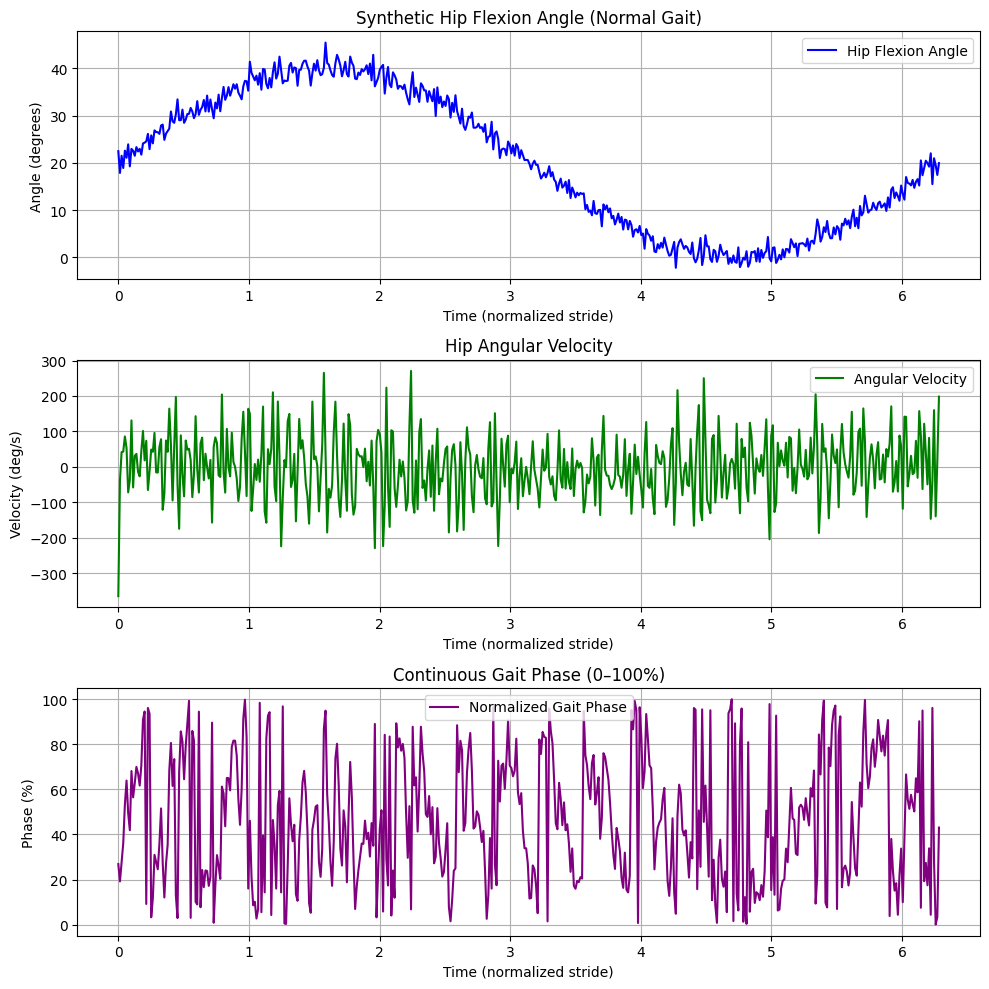

Gait phase estimation complete. Phase ranges from 0% to 100% over one stride.


<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic hip flexion angle data (mimics one gait cycle)
# Normal gait: smooth sine wave (hip flexion ~0 to 40 degrees)
t = np.linspace(0, 2 * np.pi, 500)           # one full stride
hip_angle_normal = 20 + 20 * np.sin(t)       # base 20° + ±20° swing

# Add slight noise to make it realistic
hip_angle_normal += 1.5 * np.random.randn(len(t))

# 2. Compute angular velocity (derivative of angle)
dt = t[1] - t[0]
hip_velocity_normal = np.gradient(hip_angle_normal, dt)

# 3. Compute cumulative phase (integrate velocity to get unwrapped phase)
phase_cumulative = np.cumsum(hip_velocity_normal) * dt

# Normalize to 0–100% of gait cycle (unwrap and scale)
phase = np.mod(phase_cumulative, 2 * np.pi)  # wrap to one cycle
phase_normalized = (phase / (2 * np.pi)) * 100  # 0–100%

# 4. Plot results
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].plot(t, hip_angle_normal, color='blue', label='Hip Flexion Angle')
axs[0].set_title('Synthetic Hip Flexion Angle (Normal Gait)')
axs[0].set_xlabel('Time (normalized stride)')
axs[0].set_ylabel('Angle (degrees)')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, hip_velocity_normal, color='green', label='Angular Velocity')
axs[1].set_title('Hip Angular Velocity')
axs[1].set_xlabel('Time (normalized stride)')
axs[1].set_ylabel('Velocity (deg/s)')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, phase_normalized, color='purple', label='Normalized Gait Phase')
axs[2].set_title('Continuous Gait Phase (0–100%)')
axs[2].set_xlabel('Time (normalized stride)')
axs[2].set_ylabel('Phase (%)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

# Optional: Save figure for GitHub
plt.savefig('gait_phase_estimation.png', dpi=300, bbox_inches='tight')
print("Gait phase estimation complete. Phase ranges from 0% to 100% over one stride.")